In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns = 100
pd.options.display.max_info_rows = 50

## EDA

In [13]:
""" Here we will explore the data a bit to see if any data cleaning is needed.
    We will also split the data into training and testing sets.
    Then we will train a logistic regression model and evaluate its performance.
    """


' Here we will explore the data a bit to see if any data cleaning is needed.\n    We will also split the data into training and testing sets.\n    Then we will train a logistic regression model and evaluate its performance.\n    '

In [14]:
# Load the data sets

def load_data():
    """
    Load the training and test datasets.
    """
    # Load the training data
    X_train_df = pd.read_csv('zippedData/training_set_values.csv')
    y_train_df = pd.read_csv('zippedData/training_set_labels.csv')
    
    # Load the test data
    X_test_df = pd.read_csv('zippedData/test_set_values.csv')
    
    return X_train_df, y_train_df, X_test_df

X_train_df, y_train_df, X_test_df = load_data()


In [15]:
X_test_df.shape

(14850, 40)

In [16]:
X_train_df = pd.concat([X_train_df, y_train_df['status_group']], axis=1)

In [17]:
# Deal with missing values
X_train_df['public_meeting'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)
X_train_df['permit'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)

/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_75319/4175275701.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_df['public_meeting'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)
/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_75319/4175275701.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_df['permit'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)


In [18]:
def display_unique_counts(df):
    """
    Lists all columns of a Pandas DataFrame and shows the number of unique values in each column.

    Args:
        df: The Pandas DataFrame.
    """
    for column in df.columns:
        unique_count = df[column].nunique()
        print(f"Column: {column}, Unique Values: {unique_count}")



display_unique_counts(X_train_df)

Column: id, Unique Values: 59400
Column: amount_tsh, Unique Values: 98
Column: date_recorded, Unique Values: 356
Column: funder, Unique Values: 1896
Column: gps_height, Unique Values: 2428
Column: installer, Unique Values: 2145
Column: longitude, Unique Values: 57516
Column: latitude, Unique Values: 57517
Column: wpt_name, Unique Values: 37399
Column: num_private, Unique Values: 65
Column: basin, Unique Values: 9
Column: subvillage, Unique Values: 19287
Column: region, Unique Values: 21
Column: region_code, Unique Values: 27
Column: district_code, Unique Values: 20
Column: lga, Unique Values: 125
Column: ward, Unique Values: 2092
Column: population, Unique Values: 1049
Column: public_meeting, Unique Values: 2
Column: recorded_by, Unique Values: 1
Column: scheme_management, Unique Values: 11
Column: scheme_name, Unique Values: 2695
Column: permit, Unique Values: 2
Column: construction_year, Unique Values: 55
Column: extraction_type, Unique Values: 18
Column: extraction_type_group, Uniqu

In [19]:
#Drop columns that are not useful
X_train_df.drop(columns=['id', 'date_recorded', 'funder', 'installer', 'wpt_name', 
                         'subvillage', 'region_code', 'ward', 'recorded_by',
                         'public_meeting', 'scheme_name', 'quality_group','source_type', 
                         'waterpoint_type_group','quantity_group', 'extraction_type_group',
                         'payment_type', 'num_private'], inplace=True)

In [20]:
X_train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   lga                    59400 non-null  object 
 8   population             59400 non-null  int64  
 9   scheme_management      55522 non-null  object 
 10  permit                 59400 non-null  bool   
 11  construction_year      59400 non-null  int64  
 12  extraction_type        59400 non-null  object 
 13  extraction_type_class  59400 non-null  object 
 14  management             59400 non-null  object 
 15  ma

In [21]:
display_unique_counts(X_train_df)

Column: amount_tsh, Unique Values: 98
Column: gps_height, Unique Values: 2428
Column: longitude, Unique Values: 57516
Column: latitude, Unique Values: 57517
Column: basin, Unique Values: 9
Column: region, Unique Values: 21
Column: district_code, Unique Values: 20
Column: lga, Unique Values: 125
Column: population, Unique Values: 1049
Column: scheme_management, Unique Values: 11
Column: permit, Unique Values: 2
Column: construction_year, Unique Values: 55
Column: extraction_type, Unique Values: 18
Column: extraction_type_class, Unique Values: 7
Column: management, Unique Values: 12
Column: management_group, Unique Values: 5
Column: payment, Unique Values: 7
Column: water_quality, Unique Values: 8
Column: quantity, Unique Values: 5
Column: source, Unique Values: 10
Column: source_class, Unique Values: 3
Column: waterpoint_type, Unique Values: 7
Column: status_group, Unique Values: 3


## Data Preprocessing
### Convert categorical variables to one-hot encoding

In [22]:
def custom_encode(df):      
    """
    Encodes categorical variables using OneHotEncoder and drops the original columns.

    Args:
        df: The Pandas DataFrame to encode.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.append('district_code')
    categorical_columns.remove('status_group') 

    encoder = OneHotEncoder(sparse_output=False)

    one_hot_encoded = encoder.fit_transform(df[categorical_columns])

    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    df_encoded = pd.concat([df, one_hot_df], axis=1)

    df_encoded = df_encoded.drop(categorical_columns, axis=1)

    return df_encoded

In [23]:
df_encoded = custom_encode(X_train_df)

In [24]:
# Encode the target variable to binary values
status_dict = {'functional': 1, 'non functional': 0, 'functional needs repair': 1}
df_encoded['status_group'] = df_encoded['status_group'].map(status_dict)

### Check correlation values between categories

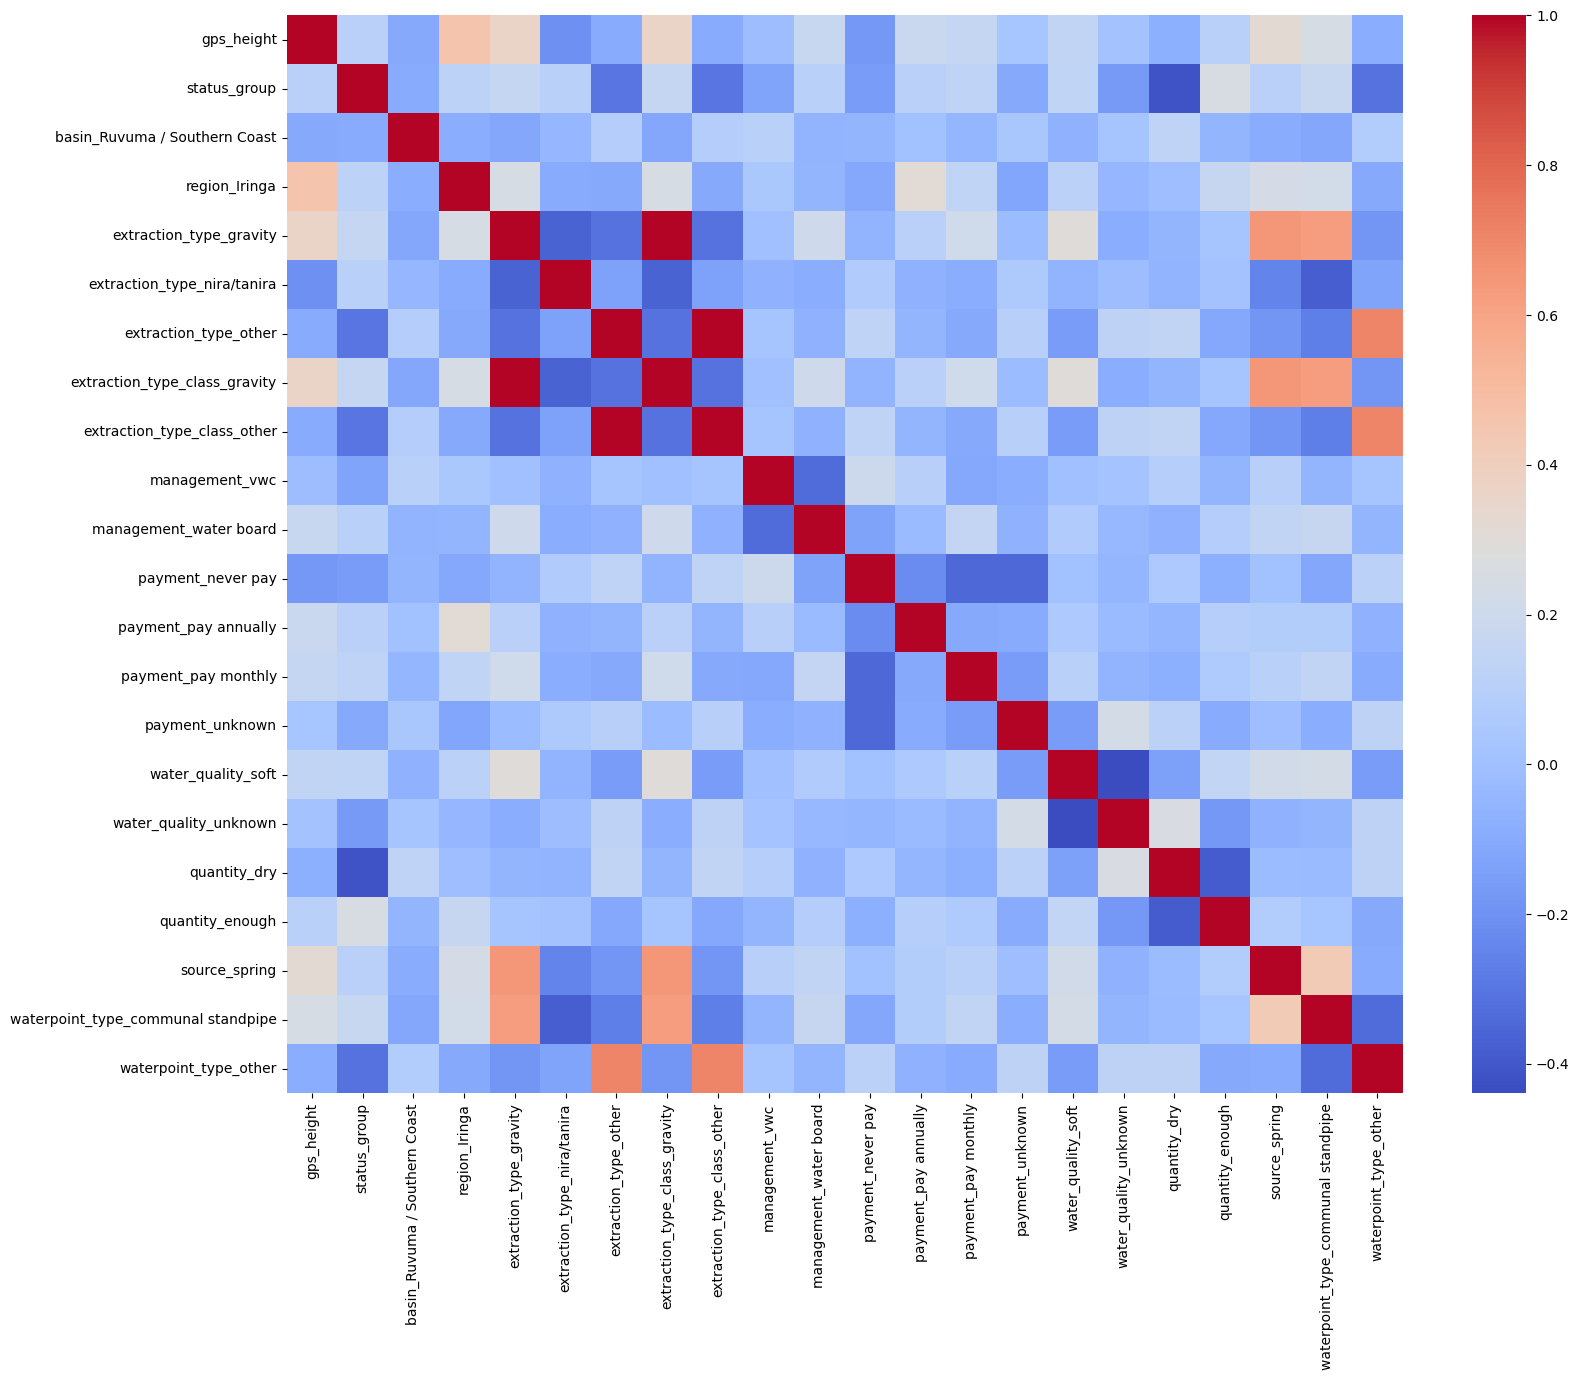

In [32]:
# Plot the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.show()

In [26]:
def drop_low_corr(df, threshold):
    """
    Drops features that have low correlated with each other.

    Args:
        df: The Pandas DataFrame.
        threshold: The correlation threshold above which features will be kept.
    """
    encoded_corr = df.corr()['status_group'].abs().sort_values(ascending=False)
    
    num_cols_to_drop = encoded_corr[encoded_corr < threshold].index.tolist()
    num_cols_to_drop = [col for col in num_cols_to_drop if col not in ['status_group']]
    df = df.drop(columns=num_cols_to_drop, axis=1)

    return df

In [27]:
df_encoded = drop_low_corr(df_encoded, 0.1)

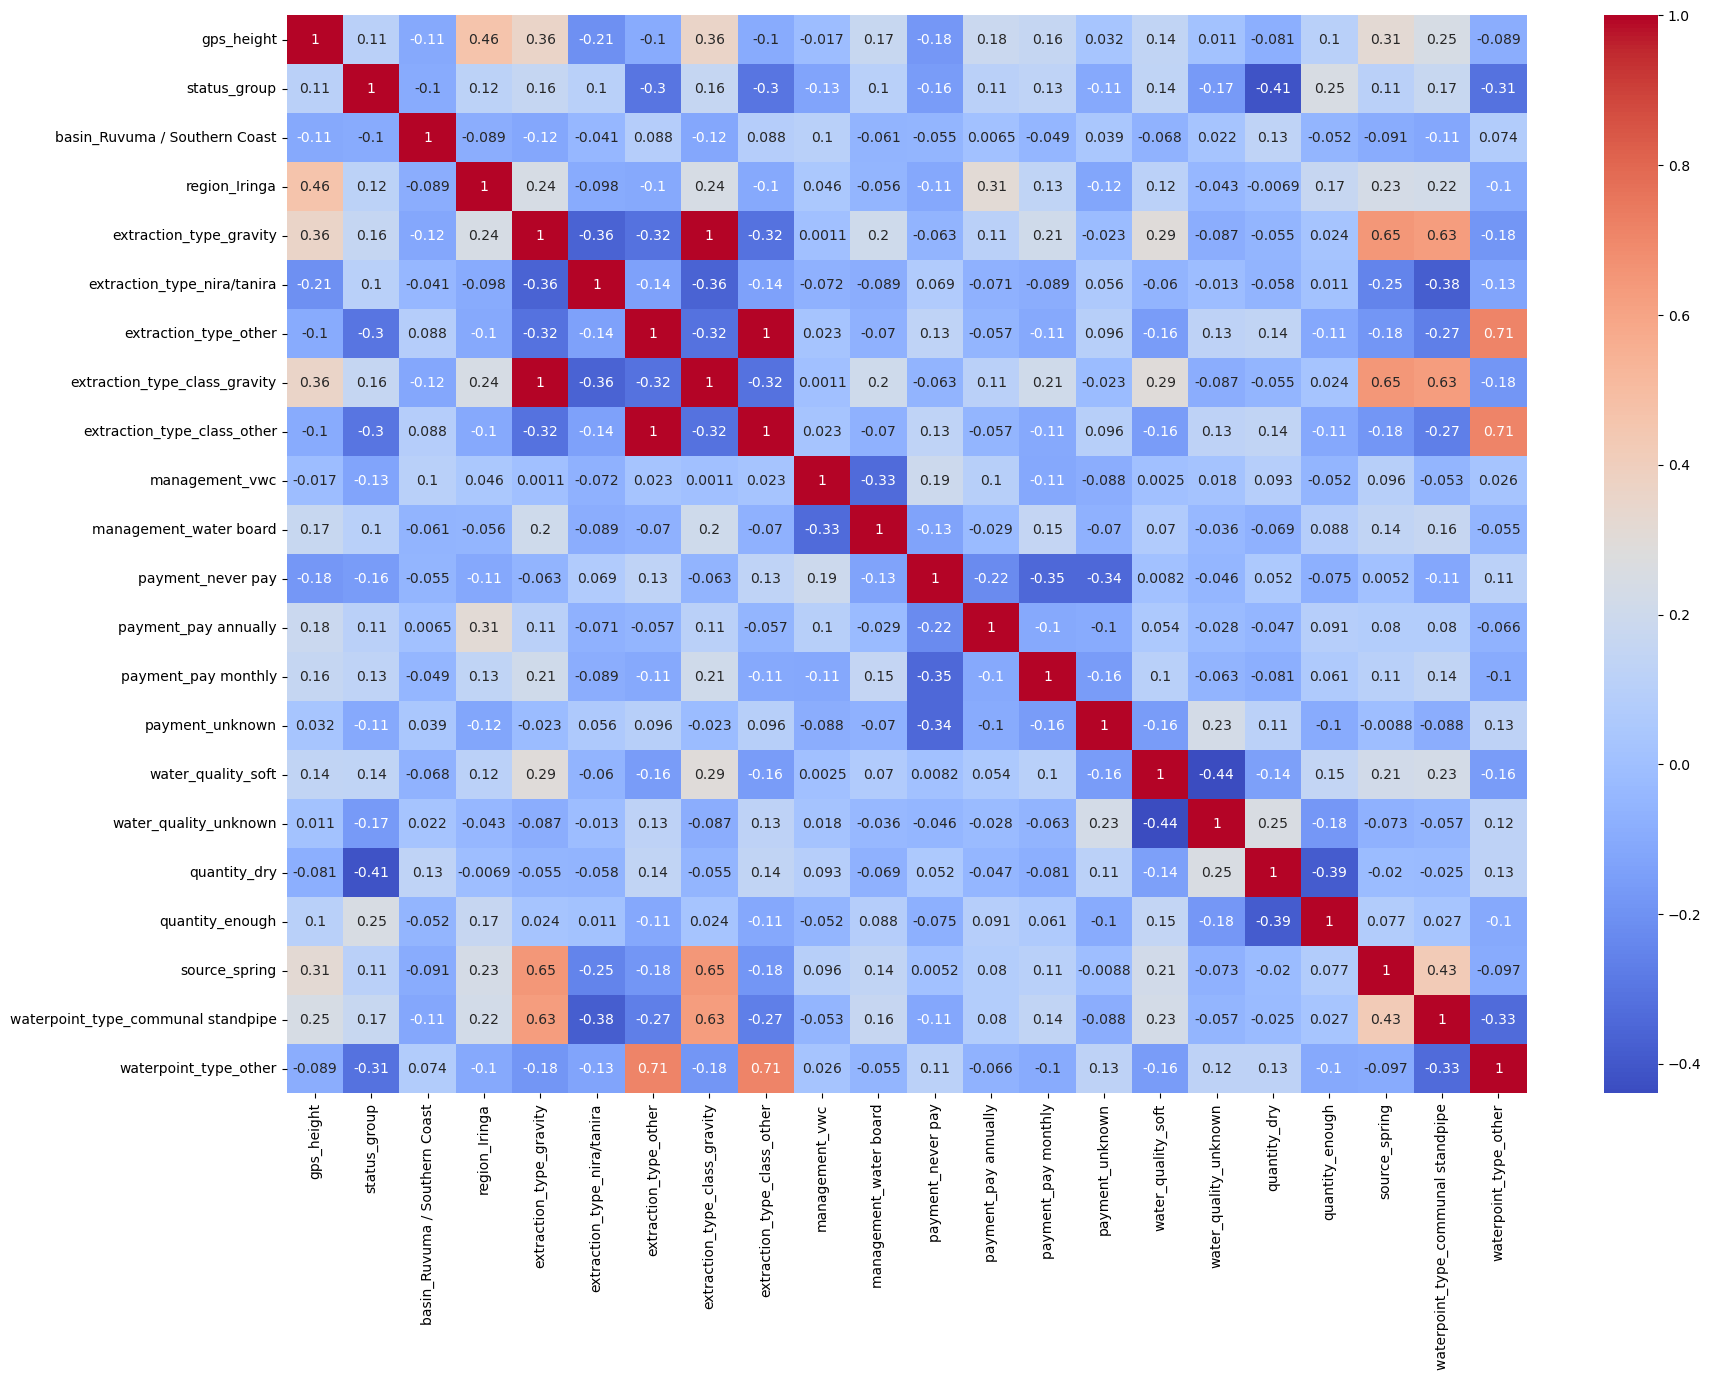

In [33]:
# Plot the new correlation matrix after dropping low correlated features
plt.figure(figsize=(20, 14))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [34]:
# Split the data into features and target variable
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

print(y_train.value_counts(),'\n\n', y_test.value_counts())

status_group
1    29308
0    18212
Name: count, dtype: int64 

 status_group
1    7268
0    4612
Name: count, dtype: int64


## Model 1
### Simple Logistic Regression with binary target

In [35]:
# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=30000)
model_log = logreg.fit(X_train, y_train)

# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)



In [36]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score)

AUC: 0.8045666911127337


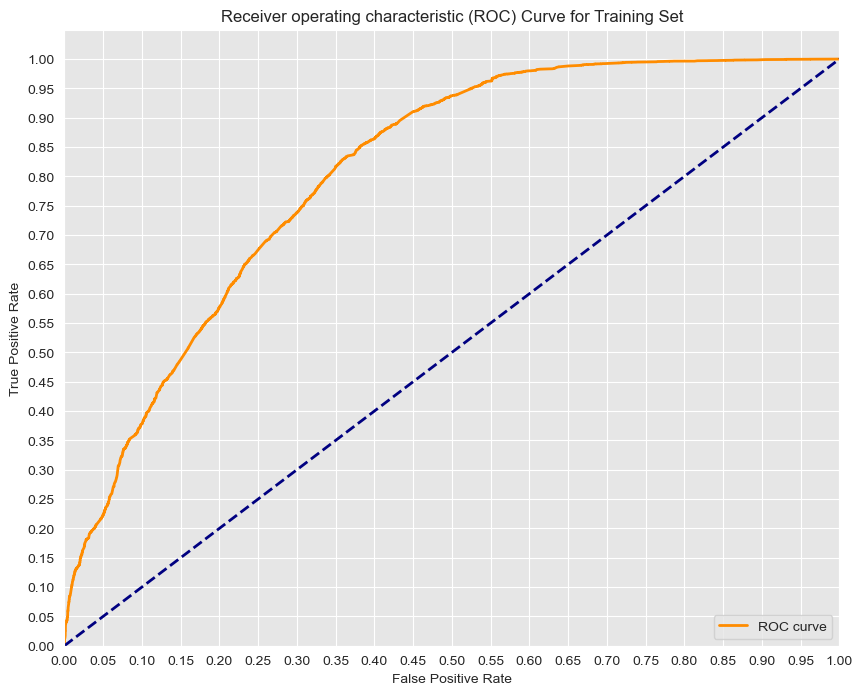

In [37]:
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

In [ ]:
m1_train_precision_score = precision_score(y_train, y_hat_train)
m1_test_precision_score = precision_score(y_test, y_hat_test)
print('Training Precision: ', m1_train_precision_score)
print('Testing Precision: ', m1_test_precision_score)
print('\n')

m1_train_recall_score = recall_score(y_train, y_hat_train)
m1_test_recall_score = recall_score(y_test, y_hat_test)
print('Training Recall: ', m1_train_recall_score)
print('Testing Recall: ', m1_test_recall_score)
print('\n')

m1_train_accuracy_score = accuracy_score(y_train, y_hat_train)
m1_test_accuracy_score = accuracy_score(y_test, y_hat_test)
print('Training Accuracy: ', m1_train_accuracy_score)
print('Testing Accuracy: ', m1_test_accuracy_score)
print('\n')

m1_train_f1_score = f1_score(y_train, y_hat_train)
m1_test_f1_score = f1_score(y_test, y_hat_test)
print('Training F1-Score: ', m1_train_f1_score)
print('Testing F1-Score: ', m1_test_f1_score)



Training Precision:  0.7533232420531168
Testing Precision:  0.7414884329986905


Training Recall:  0.9339429507301761
Testing Recall:  0.9349201981287837


Training Accuracy:  0.7706439393939394
Testing Accuracy:  0.7607744107744108


Training F1-Score:  0.8339655408802157
Testing F1-Score:  0.8270447906523856


In [38]:
overall_accuracy = accuracy_score(y_test, y_hat_test)
print(f"Overall Accuracy (using accuracy_score): {overall_accuracy}")


Overall Accuracy (using accuracy_score): 0.7607744107744108


## Second Model
### Logistic Regression with categorical target

In [25]:
#  Load the data sets again
X_train_df, y_train_df, X_test_df = load_data()

# Concatenate the training data with the labels
X_train_df = pd.concat([X_train_df, y_train_df['status_group']], axis=1)

# Deal with missing values
X_train_df['public_meeting'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)
X_train_df['permit'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)

/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/687492331.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_df['public_meeting'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)
/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/687492331.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_df['permit'] = X_train_df['permit'].replace({pd.NA: False}).infer_objects(copy=False)


In [26]:
X_train_df.drop(columns=['id', 'date_recorded', 'wpt_name', 
                         'subvillage', 'region_code', 'ward', 'recorded_by',
                         'public_meeting', 'scheme_name', 'quality_group','source_type', 
                         'waterpoint_type_group','quantity_group', 'extraction_type_group',
                         'payment_type', 'num_private', 'extraction_type_class', 'management_group', 'source_class'], inplace=True)

In [27]:
df_encoded = custom_encode(X_train_df)

In [28]:
# Encode the target variable
status_dict = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_encoded['status_group'] = df_encoded['status_group'].map(status_dict)

In [29]:
# Drop features with low correlation
#df_encoded = drop_low_corr(df_encoded, 0.07)

# Save data to pickle file so we don't have 30minutes of waiting time
#df_encoded.to_pickle('zippedData/df_m3_encoded.pkl')

# Load the data from pickle file 
df_encoded = pd.read_pickle('zippedData/df_m3_encoded.pkl')

In [30]:
# Define the target variable and features
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

status_group
1    25834
0    18212
2     3474
Name: count, dtype: int64 

 status_group
1    6425
0    4612
2     843
Name: count, dtype: int64


In [31]:
param_grid = [
    {
    'penalty': ['l1', 'l2'],
    'C': [.01, 1, 10, 100],
    'solver': ['saga', 'newton-cg', 'lbfgs', 'sag'],
    'max_iter': [2000, 10000],
    'multi_class': ['multinomial'],
    }
]

In [32]:
logmod = LogisticRegression()
clf = GridSearchCV(logmod, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
print("Best parameters found: ", best_clf.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters w

Best parameters found:  {'C': 0.01, 'max_iter': 2000, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}


/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
print("Best parameters found: ", best_clf.best_params_)
print("Best score found: ", best_clf.best_score_)
print("Best estimator found: ", best_clf.best_estimator_)




Best parameters found:  {'C': 0.01, 'max_iter': 2000, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best score found:  nan
Best estimator found:  LogisticRegression(C=0.01, max_iter=2000, multi_class='multinomial',
                   penalty='l1', solver='saga')


In [34]:
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)

# Ensure the target variable is categorical
#y = pd.Categorical(y, categories=['functional', 'non functional', 'functional needs repair'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

logreg = LogisticRegression(C=0.01, max_iter=2000, multi_class='multinomial', solver='saga')
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion Matrix:
 [[2540 2071    1]
 [ 644 5777    4]
 [ 148  690    5]]


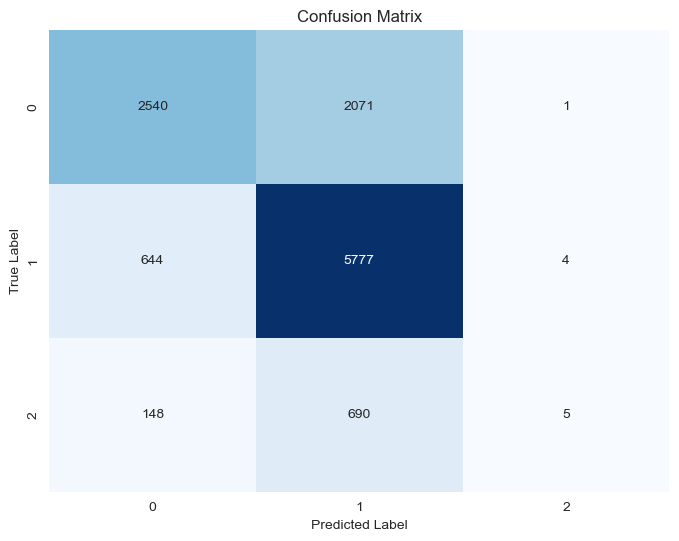

In [35]:
cm = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

report = classification_report(y_test, y_hat_test, target_names=[str(c) for c in logreg.classes_])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.55      0.64      4612
           1       0.68      0.90      0.77      6425
           2       0.50      0.01      0.01       843

    accuracy                           0.70     11880
   macro avg       0.65      0.49      0.47     11880
weighted avg       0.70      0.70      0.67     11880



## Third Model
### Logstic Regression with more data preprocessing to reduce low correlation categories

In [38]:
#  Load the data sets again
X, y, X_test = load_data()

# Concatenate the training data with the labels
X = pd.concat([X, y['status_group']], axis=1)

# Deal with missing values
X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)

/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/2838531062.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/2838531062.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)


In [39]:
display_unique_counts(X)

Column: id, Unique Values: 59400
Column: amount_tsh, Unique Values: 98
Column: date_recorded, Unique Values: 356
Column: funder, Unique Values: 1896
Column: gps_height, Unique Values: 2428
Column: installer, Unique Values: 2145
Column: longitude, Unique Values: 57516
Column: latitude, Unique Values: 57517
Column: wpt_name, Unique Values: 37399
Column: num_private, Unique Values: 65
Column: basin, Unique Values: 9
Column: subvillage, Unique Values: 19287
Column: region, Unique Values: 21
Column: region_code, Unique Values: 27
Column: district_code, Unique Values: 20
Column: lga, Unique Values: 125
Column: ward, Unique Values: 2092
Column: population, Unique Values: 1049
Column: public_meeting, Unique Values: 2
Column: recorded_by, Unique Values: 1
Column: scheme_management, Unique Values: 11
Column: scheme_name, Unique Values: 2695
Column: permit, Unique Values: 2
Column: construction_year, Unique Values: 55
Column: extraction_type, Unique Values: 18
Column: extraction_type_group, Uniqu

In [40]:
X.drop(columns=['id', 'date_recorded', 'wpt_name', 
                'subvillage', 'region_code', 'recorded_by',
                'public_meeting', 'quality_group','source_type', 
                'waterpoint_type_group','quantity_group', 'extraction_type_group',
                'payment_type', 'num_private', 'extraction_type_class', 'management_group', 'source_class'], inplace=True)

In [41]:
cat_list = ['funder', 'installer', 'lga', 'ward', 'scheme_name']

In [42]:
rarity_threshold = 700
rare_category_name = 'Other'


In [43]:
# Create new columns to store the grouped data
df_grouped_loop = X.copy() # Make a copy to avoid modifying original df directly

for col in cat_list:
    # Calculate value counts (normalized for percentages)
    counts = df_grouped_loop[col].value_counts()

    # Identify rare categories for the current column
    rare_categories = counts[counts < rarity_threshold].index.tolist()

    # Apply the grouping
    df_grouped_loop[col] = df_grouped_loop[col].replace(rare_categories, rare_category_name)


print("\n--- Value Counts After Grouping (Loop Method) ---")
for col in cat_list:
    print(f"Value counts for {col}:")
    print(df_grouped_loop[col].value_counts())
    print("\n")
# Check the unique values in the columns


--- Value Counts After Grouping (Loop Method) ---
Value counts for funder:
funder
Other                     29322
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
0                           777
Norad                       765
Name: count, dtype: int64


Value counts for installer:
installer
Other         29980
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Hesawa          840
0               777
TCRS            707
Name: count, dtype: int64


Value counts for lga:
lga
Other            36108
Njombe            2503
Arusha Rural      1252
Moshi Rural     

In [44]:
display_unique_counts(df_grouped_loop)

Column: amount_tsh, Unique Values: 98
Column: funder, Unique Values: 16
Column: gps_height, Unique Values: 2428
Column: installer, Unique Values: 10
Column: longitude, Unique Values: 57516
Column: latitude, Unique Values: 57517
Column: basin, Unique Values: 9
Column: region, Unique Values: 21
Column: district_code, Unique Values: 20
Column: lga, Unique Values: 24
Column: ward, Unique Values: 1
Column: population, Unique Values: 1049
Column: scheme_management, Unique Values: 11
Column: scheme_name, Unique Values: 1
Column: permit, Unique Values: 2
Column: construction_year, Unique Values: 55
Column: extraction_type, Unique Values: 18
Column: management, Unique Values: 12
Column: payment, Unique Values: 7
Column: water_quality, Unique Values: 8
Column: quantity, Unique Values: 5
Column: source, Unique Values: 10
Column: waterpoint_type, Unique Values: 7
Column: status_group, Unique Values: 3


In [45]:
df_encoded = custom_encode(df_grouped_loop)

In [46]:
# Encode the target variable
status_dict = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_encoded['status_group'] = df_encoded['status_group'].map(status_dict)

In [47]:
# Drop features with low correlation
df_encoded = drop_low_corr(df_encoded, 0.07)

# Save data to pickle file so we don't have 30minutes of waiting time
df_encoded.to_pickle('zippedData/df_m4_encoded.pkl')

# Load the data from pickle file 
#df_encoded = pd.read_pickle('zippedData/df_m4_encoded.pkl')

In [48]:
# Define the target variable and features
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train samples per class: {np.bincount(y_train)}")
print(f"Test samples per class: {np.bincount(y_test)}")

Train samples per class: [15977 22581  3022]
Test samples per class: [6847 9678 1295]


In [50]:
logreg = LogisticRegression(C=0.01, max_iter=2000,
                   multi_class='multinomial', penalty='l1', solver='saga')
model_log = logreg.fit(X_train, y_train)



/opt/anaconda3/envs/modern/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
# Predict on test set
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

Confusion Matrix:
 [[3659 3186    2]
 [ 894 8782    2]
 [ 189 1101    5]]


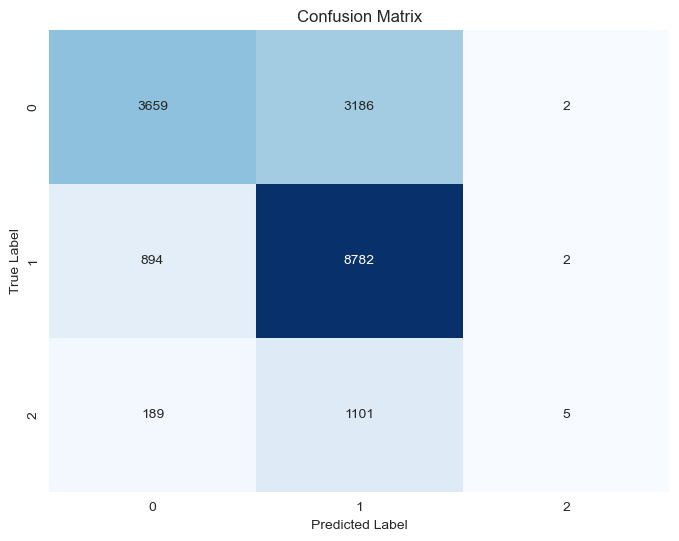

In [52]:
cm = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
report = classification_report(y_test, y_hat_test, target_names=[str(c) for c in logreg.classes_])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63      6847
           1       0.67      0.91      0.77      9678
           2       0.56      0.00      0.01      1295

    accuracy                           0.70     17820
   macro avg       0.67      0.48      0.47     17820
weighted avg       0.70      0.70      0.66     17820



In [54]:
logreg.score(X_test, y_test)

0.6984287317620651

## Fourth Model
### Random Forrest Classifier

In [61]:
#  Load the data sets again
X, y, X_test = load_data()

# Concatenate the training data with the labels
X = pd.concat([X, y['status_group']], axis=1)

# Deal with missing values
X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)

/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_75319/2838531062.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_75319/2838531062.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)


In [62]:
X.drop(columns=['id', 'date_recorded', 'wpt_name', 
                'subvillage', 'region_code', 'recorded_by', 'lga', 'region',
                'public_meeting', 'quality_group','source_type', 'basin',
                'waterpoint_type_group','quantity_group', 'extraction_type_group',
                'payment_type', 'num_private', 'extraction_type_class', 'management_group', 'source_class'], inplace=True)

In [63]:
cat_list = ['funder', 'installer', 'ward', 'scheme_name']

In [64]:
rarity_threshold = 500
rare_category_name = 'Other'


In [65]:
X.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'district_code', 'ward', 'population', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

In [66]:
# Create new columns to store the grouped data
df_grouped_loop = X.copy() # Make a copy to avoid modifying original df directly

for col in cat_list:
    # Calculate value counts (normalized for percentages)
    counts = df_grouped_loop[col].value_counts()

    # Identify rare categories for the current column
    rare_categories = counts[counts < rarity_threshold].index.tolist()

    # Apply the grouping
    df_grouped_loop[col] = df_grouped_loop[col].replace(rare_categories, rare_category_name)



In [67]:
df_encoded = custom_encode(df_grouped_loop)

In [68]:
# Encode the target variable
status_dict = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_encoded['status_group'] = df_encoded['status_group'].map(status_dict)

In [69]:
df_encoded.columns.tolist()

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'permit',
 'construction_year',
 'status_group',
 'funder_0',
 'funder_Danida',
 'funder_Dhv',
 'funder_District Council',
 'funder_Dwsp',
 'funder_Germany Republi',
 'funder_Government Of Tanzania',
 'funder_Hesawa',
 'funder_Kkkt',
 'funder_Ministry Of Water',
 'funder_Norad',
 'funder_Other',
 'funder_Private Individual',
 'funder_Rwssp',
 'funder_Tasaf',
 'funder_Tcrs',
 'funder_Unicef',
 'funder_Water',
 'funder_World Bank',
 'funder_World Vision',
 'funder_nan',
 'installer_0',
 'installer_CES',
 'installer_Central government',
 'installer_Commu',
 'installer_Community',
 'installer_DANID',
 'installer_DANIDA',
 'installer_DWE',
 'installer_District Council',
 'installer_Government',
 'installer_HESAWA',
 'installer_Hesawa',
 'installer_KKKT',
 'installer_Other',
 'installer_RWE',
 'installer_TCRS',
 'installer_nan',
 'ward_Other',
 'scheme_management_Company',
 'scheme_management_Other',
 'scheme_management

In [70]:
# Drop features with low correlation
df_encoded = drop_low_corr(df_encoded, 0.07)

# Save data to pickle file so we don't have 30minutes of waiting time
df_encoded.to_pickle('zippedData/df_m5_encoded.pkl')

# Load the data from pickle file 
#df_encoded = pd.read_pickle('zippedData/df_m5_encoded.pkl')

In [71]:
# Define the target variable and features
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train samples per class: {np.bincount(y_train)}")
print(f"Test samples per class: {np.bincount(y_test)}")

Train samples per class: [15977 22581  3022]
Test samples per class: [6847 9678 1295]


In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# Predict on test set
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [76]:
rf.score(X_train,y_train)

0.9939393939393939

In [77]:
rf.score(X_test,y_test)

0.7672839506172839

Confusion Matrix:
 [[5209 1472  166]
 [1216 8025  437]
 [ 227  629  439]]


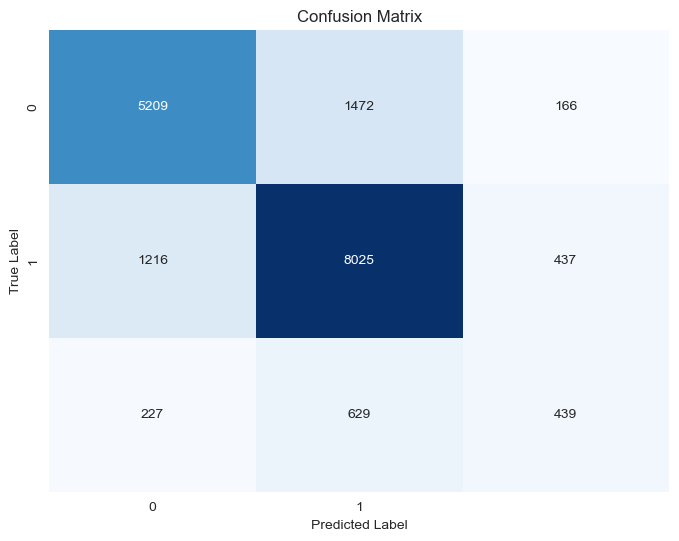

In [78]:
cm = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [79]:
report = classification_report(y_test, y_hat_test)

In [80]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6847
           1       0.79      0.83      0.81      9678
           2       0.42      0.34      0.38      1295

    accuracy                           0.77     17820
   macro avg       0.67      0.64      0.65     17820
weighted avg       0.76      0.77      0.76     17820



In [81]:
overall_accuracy = accuracy_score(y_test, y_hat_test)
print(f"Overall Accuracy (using accuracy_score): {overall_accuracy}")


Overall Accuracy (using accuracy_score): 0.7672839506172839


## Fifth Model
### Tuned Random Forrest Classifier

In [76]:
#  Load the data sets again
X, y, X_test = load_data()

# Concatenate the training data with the labels
X = pd.concat([X, y['status_group']], axis=1)

# Deal with missing values
X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)

X.drop(columns=['id', 'date_recorded', 'wpt_name', 
                'subvillage', 'region_code', 'recorded_by', 'lga', 'region',
                'public_meeting', 'quality_group','source_type', 'basin',
                'waterpoint_type_group','quantity_group', 'extraction_type_group',
                'payment_type', 'num_private', 'extraction_type_class', 'management_group', 'source_class'], inplace=True)

cat_list = ['funder', 'installer', 'ward', 'scheme_name']
rarity_threshold = 420
rare_category_name = 'Other'

/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/912762597.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['public_meeting'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)
/var/folders/8c/vj5_dvhx0sxcvm2xg1_g0g800000gn/T/ipykernel_67563/912762597.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['permit'] = X['permit'].replace({pd.NA: False}).infer_objects(copy=False)


In [77]:
# Create new columns to store the grouped data
df_grouped_loop = X.copy() # Make a copy to avoid modifying original df directly

for col in cat_list:
    # Calculate value counts (normalized for percentages)
    counts = df_grouped_loop[col].value_counts()

    # Identify rare categories for the current column
    rare_categories = counts[counts < rarity_threshold].index.tolist()

    # Apply the grouping
    df_grouped_loop[col] = df_grouped_loop[col].replace(rare_categories, rare_category_name)

In [78]:
df_encoded = custom_encode(df_grouped_loop)
# Encode the target variable
status_dict = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_encoded['status_group'] = df_encoded['status_group'].map(status_dict)

In [79]:
# Drop features with low correlation
#df_encoded = drop_low_corr(df_encoded, 0.07)

# Save data to pickle file so we don't have 30minutes of waiting time
#df_encoded.to_pickle('zippedData/df_m6_encoded.pkl')

# Load the data from pickle file 
df_encoded = pd.read_pickle('zippedData/df_m5_encoded.pkl')

In [80]:
# Define the target variable and features
y = df_encoded['status_group']
X = df_encoded.drop(columns=['status_group'], axis=1)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [81]:
param_grid = [
    {
    'n_estimators': [5500],
    'max_depth': [100],
    'min_samples_split': [10],
    'max_features': ['sqrt', 'log2']
    }
]

In [82]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           verbose=10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500
[CV 1/5; 1/2] END max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500;, score=0.778 total time= 2.1min
[CV 2/5; 1/2] START max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500
[CV 2/5; 1/2] END max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500;, score=0.780 total time= 2.1min
[CV 3/5; 1/2] START max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500
[CV 3/5; 1/2] END max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500;, score=0.779 total time= 2.1min
[CV 4/5; 1/2] START max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500
[CV 4/5; 1/2] END max_depth=100, max_features=sqrt, min_samples_split=10, n_estimators=5500;, score=0.775 total time= 2.1min
[CV 5/5; 1/2] START max_depth=100, max_features=sqrt, min_sample

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [100], 'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [10], 'n_estimators': [5500]}],
             verbose=10)

In [83]:
rf = RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_split=10, n_estimators=5500)

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=10, n_estimators=5500)

In [85]:
# Predict on test set
#y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

Confusion Matrix:
 [[5151 1618   78]
 [ 963 8521  194]
 [ 232  707  356]]


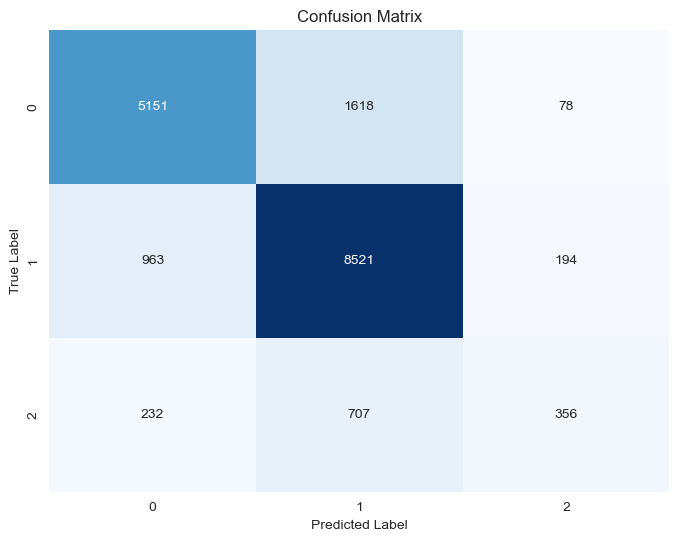

In [86]:
cm = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [87]:
report = classification_report(y_test, y_hat_test, target_names=[str(c) for c in rf.classes_])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      6847
           1       0.79      0.88      0.83      9678
           2       0.57      0.27      0.37      1295

    accuracy                           0.79     17820
   macro avg       0.72      0.64      0.66     17820
weighted avg       0.78      0.79      0.78     17820



In [88]:
overall_accuracy = accuracy_score(y_test, y_hat_test)
print(f"Overall Accuracy (using accuracy_score): {overall_accuracy:.4f}\n")


Overall Accuracy (using accuracy_score): 0.7872

